# Task 4.9 Part 2

## Step 1

### Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Import Data

In [2]:
# Create folder path
path = r'/Users/madelinegamache/Documents/InstaCart Basket Analysis'

In [3]:
#Importing customer_ords_prods_merged.pkl dataframe
df_cust_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'customer_ords_prods_merged.pkl'))

In [4]:
# Check output
df_cust_merge.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,total_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## Step 2

### Create Bar Chart

<Axes: >

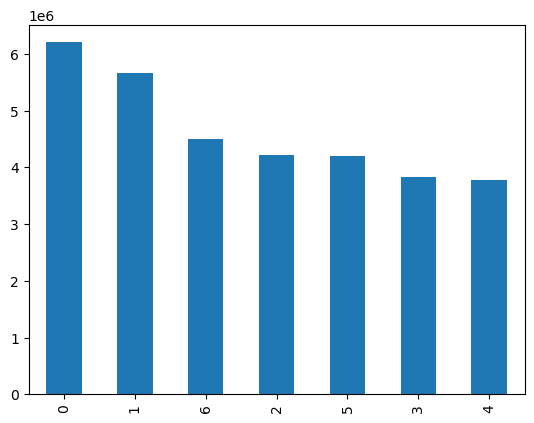

In [5]:
# Create bar chart
df_cust_merge['order_day_of_week'].value_counts().plot.bar()

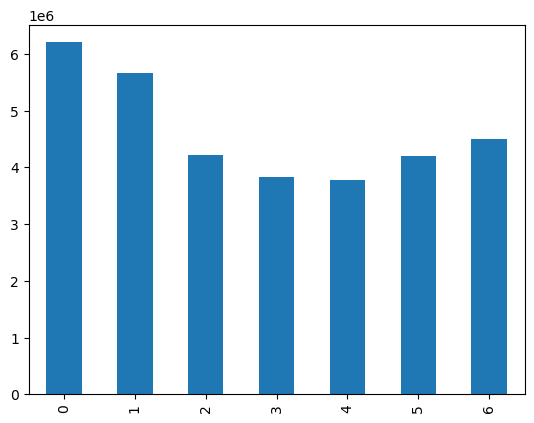

In [6]:
# Sort x-axis 0-6 since they represent weekdays
bar = df_cust_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
# Export bar chart as data visualization
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### Create Histogram

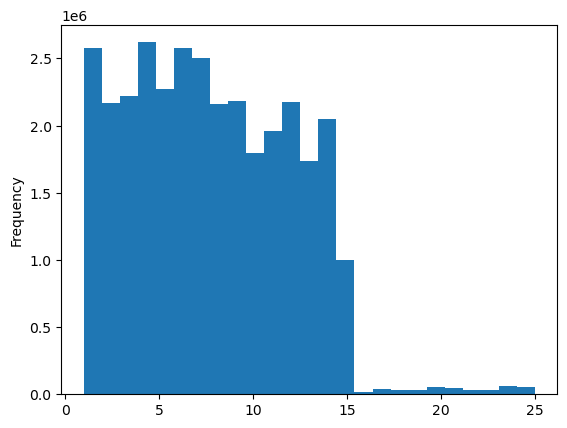

In [8]:
# Create histogram for prices column with 25 bins
hist_1 = df_cust_merge['prices'].plot.hist(bins = 25)

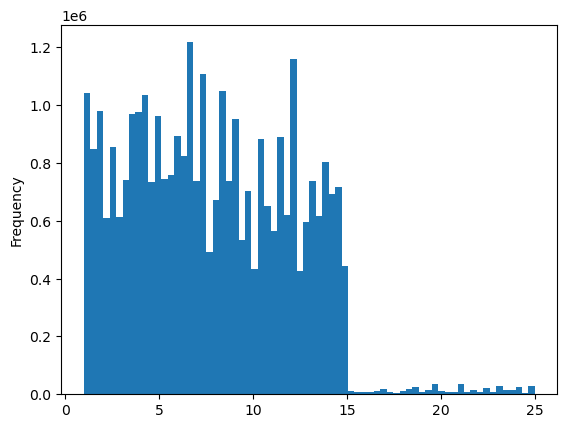

In [9]:
# Create histogram for prices column with 70 bins
hist_2 = df_cust_merge['prices'].plot.hist(bins = 70)

### Create Scatterplot

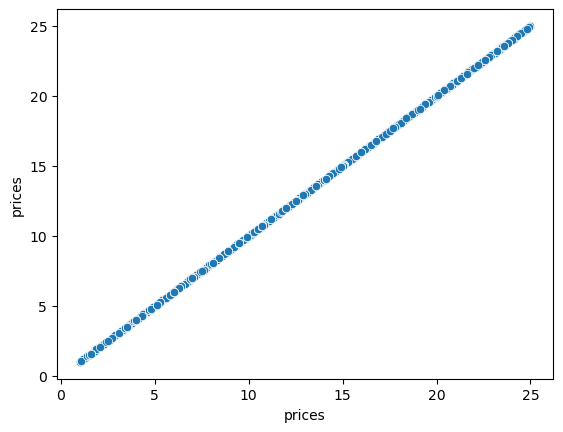

In [10]:
# Scatterplot of the prices column
scatter = sns.scatterplot(x = 'prices', y = 'prices',data = df_cust_merge)

### Create Line Chart

In [11]:
# Create a 70/30 Sampling of the dataframe 
np.random.seed(4)
dev = np.random.rand(len(df_cust_merge)) <= 0.7

In [12]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [13]:
# Sample Example of the function
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [15]:
# Store 70% of sample in the dataframe big
big = df_cust_merge[dev]

In [16]:
# Store 30% of sample in the dataframe small
small = df_cust_merge[~dev]

In [17]:
# Check length of the entire dataframe
len(df_cust_merge)

32404859

In [18]:
# Check length of sample dataframes an make sure it matches length of entire dataframe
len(big)+len(small)

32404859

In [19]:
# Create new dataframe where prices and order_day_of_week columns are from the small subset
df_2 = small[['order_day_of_week','prices']]

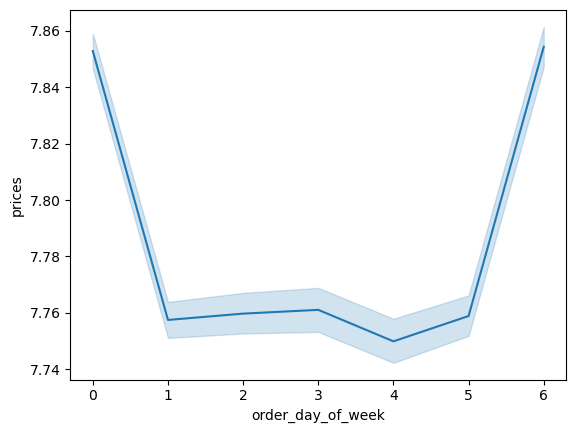

In [20]:
# Create a line graph using the dataframe made of the small sample space
line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')

## Step 3 

### Create Histogram for order_hour_of_day

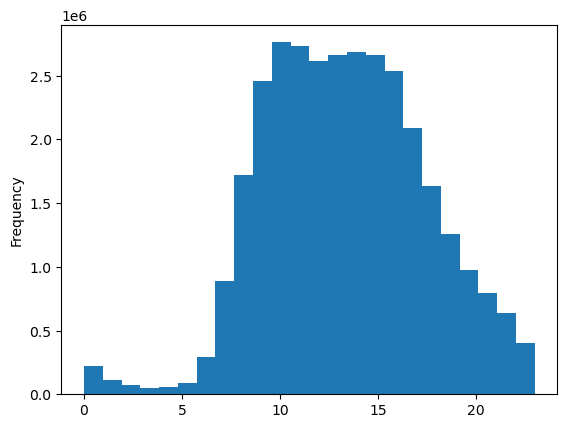

In [21]:
# Histogram for order_hour_of_day column with 24 bins (one for each hour of the day)
hist_3 = df_cust_merge['order_hour_of_day'].plot.hist(bins = 24)

### Observations:
1. Histogram demostrates the frequency of shoppers throughout the day. 
2. The most frequent time for shoppers is between 10-16, which is 10am to 4pm.
3. Lowest frequency is between hours 0-6 which is 12:00am (midnight) to 6am.
4. Frequency drops off after hour 16 (4pm) consistently until hour 23 (11pm)

In [23]:
# Export the histogram
hist_3.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'hist_hour_order_freq.png' ))

## Step 4

### Create bar chart for loyalty_flag

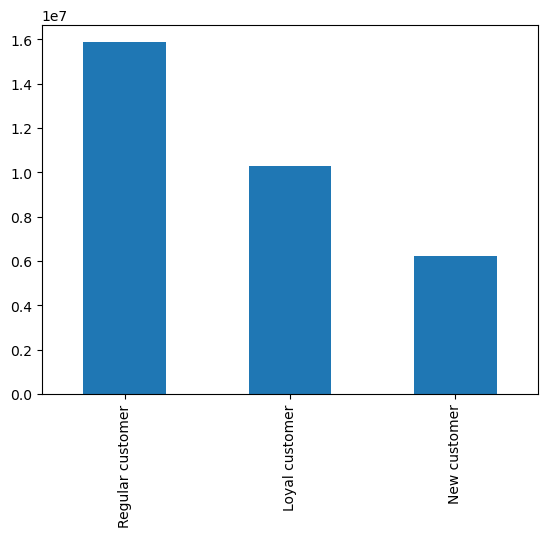

In [24]:
# Create bar chart to measure loyalty
bar_4 = df_cust_merge['loyalty_flag'].value_counts().plot.bar()

In [25]:
# Export bar chart
bar_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag_bar.png'))

## Step 5

### Check for difference in 'prices' depending on hour of the day

In [26]:
# Make line Chart to determine if there's a difference in expenditure between hour of day and prices
df_line = small[['order_hour_of_day', 'prices']]

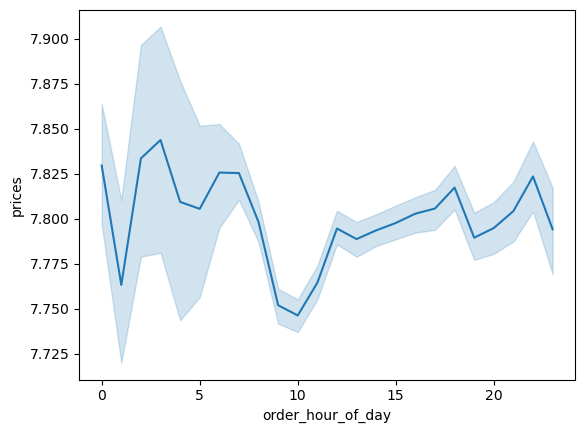

In [27]:
# Create the line chart
line_2 = sns.lineplot(data = df_line, x = 'order_hour_of_day', y = 'prices')

In [28]:
# Export line chart
line_2.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'line_2_ohd.png' ))

## Step 6

### Exploratory analysis of customer demographics

In [30]:
# Make a line chart to determine if there's a connection between age and number of dependants
df_line_2 = small[['age', 'total_dependants']]

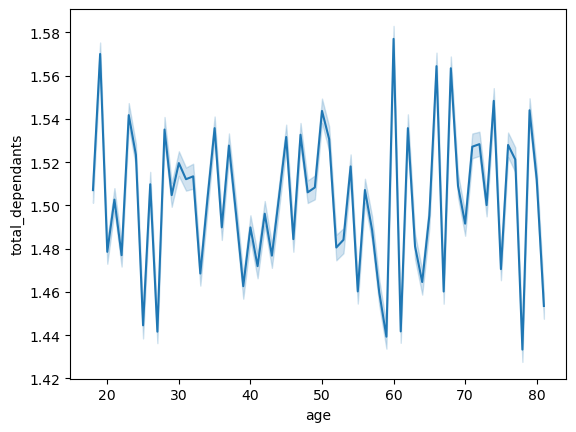

In [31]:
# Create the line chart
line_3 = sns.lineplot(data = df_line_2, x = 'age', y = 'total_dependants')

In [32]:
# Export the line chart
line_3.figure.savefig(os.path.join (path,'04 Analysis', 'Visualizations', 'age_dependants_connection.png'))

### Observations:
1. There doesn't seem to be any clear connection between age and number of dependants.
2. The 20's - 40's age groups seem to be quite erratic because these are the most common ages people decide whether or not to have families.
3. The large spike in the age 60 spot may be a clue that some people are now taking care of their elderly parents, which could determine shoping habits.

## Step 7

### Exploratory analysis of customer demographics cont..

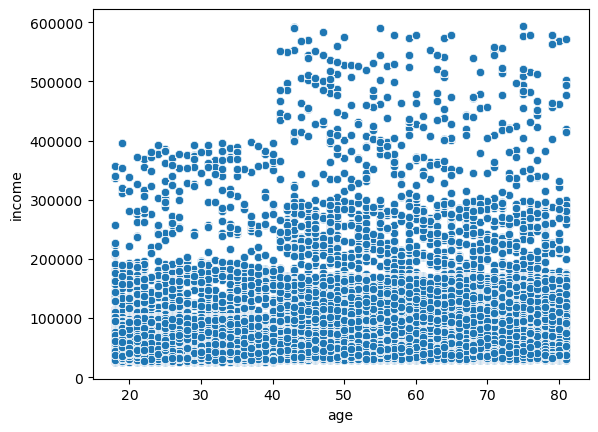

In [33]:
# Create scatterplot to determine if there is a connection between age and spending power
scat_2 = sns.scatterplot(x = 'age', y = 'income',data = df_cust_merge)

In [34]:
# Export scatterplot
scat_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_age_income.png'))

### Observations:
1. The vast majority across all age groups tend to be making under 200K.
2. Around age 40+, more of the population is making up to 300K. 
3. Nobody before age 40 is making above 400K.
4. income tends to generally increase around age 40.